In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import illustris_python as il
import h5py as hp

pplib.imports()

DRAFTPATH = '/Users/cosinga/code/hicolor_draft_two/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/binth/'
TNGPATH = '/Users/cosinga/illustris/L75n1820TNG/output/'
HIPATH = '/Users/cosinga/illustris/L75n1820TNG/postprocessing/hih2/hih2_galaxy_099.hdf5'

In [17]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/11-20_pkdatasort.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1, -1), frameon = False, fontsize = 12, loc = 'lower left')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.setXLabel(pplib.wnum())
ds.setYLabel(pplib.pklab('HI', 'gal'))
ds.setOrder('snapshot', [99, 67, 50])
ds.displayAs('censat', ['centrals_satellites', 'satellites_centrals', 'satellites', 'centrals', 'both'], ['HI (cen) x Gal (sat)', 'Gal (cen) x HI (sat)', 'Satellites', 'Centrals', 'All Terms'])
ds.printMatching({'path':'censat', 'post_process':'corr_coef'})
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return


The row values for censat: ['centrals_satellites', 'satellites_centrals', 'satellites', 'centrals', 'both']
The column values for color: ['red']


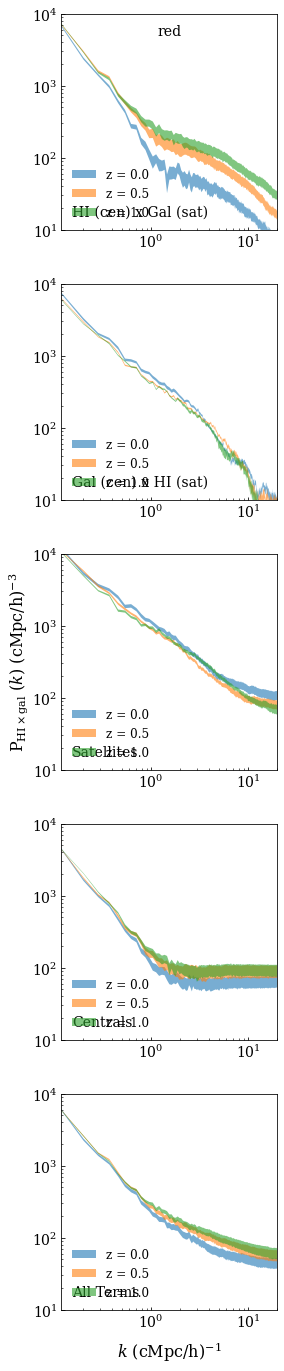

In [18]:
ip = {'path':'censat', 'color':'red','is_auto':False, 'fieldname':'hisubhalo_galaxy',
     'space':'real', 'post_process':'no key found', 'censat':['centrals_satellites', 'satellites_centrals', 'satellites', 'centrals', 'both']}
fg = ds.figrid('snapshot', 'censat', 'color', ip)
fg.axisArgs(ylim = (10, 1e4))
fg.legendArgs(slc = slice(None))
fg.autoFill()
fg.plot()

This gives an idea of how the relationship between HI and galaxies evolves with respect to a central/satellite distinction. Of particular interest is in the one-halo term, the contribution from centrals x satellites (independent of the satellite x satellite term). The left panel shows the correlation with HI in centrals and all satellite galaxies. Between z = 0 and z = 0.5 there is a clear and significant drop, which is particularly true in the red galaxies. The right panel, which shows the correlation between centrals and HI in satellites, does not have nearly the same strength in time evolution. 

The row values for color: ['blue']
The column values for snapshot: [99, 67, 50]


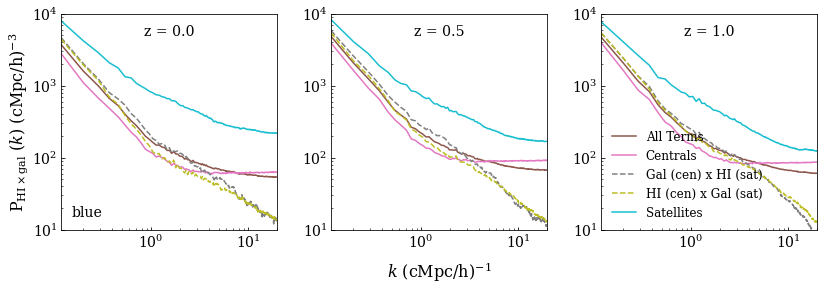

In [12]:
ip['color'] = 'blue'
fg = ds.figrid('censat', 'color', 'snapshot', ip)
fg.axisArgs(ylim = (10, 1e4))

fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.plotArgs({'censat':'centrals_satellites'}, linestyle = '--')
fg.plotArgs({'censat':'satellites_centrals'}, linestyle = '--')
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for censat: ['satellites']


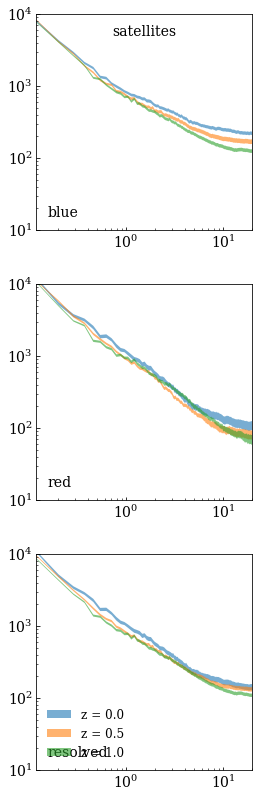

In [46]:
ip = {'path':'censat', 'color':['blue', 'red', 'resolved'],'is_auto':False, 'fieldname':'hisubhalo_galaxy',
     'space':'real', 'post_process':'no key found', 'censat':['satellites']}
fg = ds.figrid('snapshot', 'color', 'censat', ip)
fg.axisArgs(ylim = (10, 1e4))
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for censat: ['satellites']


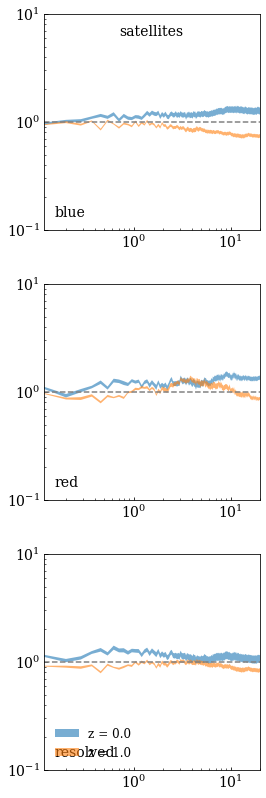

In [47]:
fg = ds.figrid('snapshot', 'color', 'censat', ip)
fg.axisArgs(ylim = (1e-1, 10))
fg.autoNorm({'snapshot':67}, ['model'])
fg.autoFill()
fg.plotOnes()
fg.plot()

# Why does s x s term of hi x blue increase with time?

The row values for color: ['blue']
The column values for censat: ['satellites', 'centrals']


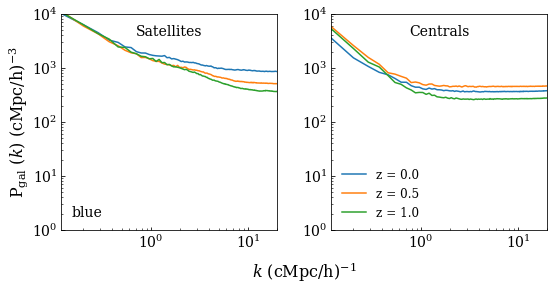

In [125]:
ip = {'path':'censat', 'color':['blue'],'is_auto':True, 'fieldname':'galaxy',
     'space':'real', 'censat':['satellites', 'centrals']}
fg = ds.figrid('snapshot', 'color', 'censat', ip)
fg.axisArgs(ylim = (1, 1e4))
fg.setYLabel(pplib.pklab('gal'))
fg.autoFill()
fg.plot()

In [123]:
ip = {'path':'censat', 'color':['blue'],'is_auto':False, 'HI_fieldname':'no key found',
     'space':'real'}
ds.printMatching(ip)